In [2]:
#imports
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import nltk
import pandas as pd
#nltk.download()
from nltk.corpus import stopwords # Import the stop word list
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("imdb_master.csv", encoding="ISO-8859-1")

In [4]:
data


,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt
5,5,test,"A funny thing happened to me while watching ""M...",neg,10004_2.txt
6,6,test,This German horror film has to be one of the w...,neg,10005_2.txt
7,7,test,"Being a long-time fan of Japanese film, I expe...",neg,10006_2.txt
8,8,test,"""Tokyo Eyes"" tells of a 17 year old Japanese g...",neg,10007_4.txt
9,9,test,Wealthy horse ranchers in Buenos Aires have a ...,neg,10008_4.txt


In [5]:
data.columns

Index(['Unnamed: 0', 'type', 'review', 'label', 'file'], dtype='object')

In [6]:
data.shape

(100000, 5)

In [7]:
data.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [8]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) 
sno = nltk.stem.SnowballStemmer('english') 

def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return cleaned

In [9]:
i=0
str1=' '
final_string=[]
all_positive_words=[] 
all_negative_words=[] 
s=''
for sent in data['review'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent) 
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (data['label'].values)[i] == "pos": 
                        all_positive_words.append(s) 
                    if(data['label'].values)[i] == "neg":
                        all_negative_words.append(s) 
                else:
                    continue
            else:
                continue 
    
    str1 = b" ".join(filtered_sentence) 
    
    final_string.append(str1)
    i+=1

In [10]:
data['cleaned_review']=final_string

In [11]:
def posneg(x):
    if x=="neg":
        return 0
    elif x=="pos":
        return 1
    return x

filtered_score = data["label"].map(posneg)
data["score"] = filtered_score

In [12]:
test_data = data[:25000]
train_data = data[25000:50000]

In [13]:
X_train = train_data["cleaned_review"]
y_train = train_data["score"]

X_test = test_data["cleaned_review"]
y_test = test_data["score"]

In [14]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [15]:
#TF_IDF
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_idf_train = tf_idf_vect.fit_transform(X_train.values)
tf_idf_test = tf_idf_vect.transform(X_test.values)

In [16]:
alpha_range = list(np.arange(1,50,5))
len(alpha_range)

10

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB

from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

alpha_scores=[]

for a in alpha_range:
    clf = MultinomialNB(alpha=a)
    scores = cross_val_score(clf, tf_idf_train, y_train, cv=5, scoring='accuracy')
    alpha_scores.append(scores.mean())
    print(a,scores.mean())

f:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


1 0.8302
6 0.83556
11 0.83404
16 0.8324
21 0.83128
26 0.82992
31 0.82884
36 0.82736
41 0.82584
46 0.82452


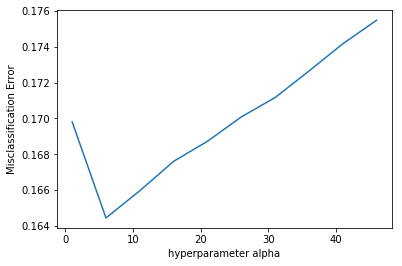

In [18]:
MSE = [1 - x for x in alpha_scores]


optimal_alpha_bnb = alpha_range[MSE.index(min(MSE))]

# plot misclassification error vs alpha
plt.plot(alpha_range, MSE)

plt.xlabel('hyperparameter alpha')
plt.ylabel('Misclassification Error')
plt.show()

In [19]:
optimal_alpha_bnb

6

In [20]:
clf = MultinomialNB(alpha=6)
clf.fit(tf_idf_train,y_train)

MultinomialNB(alpha=6, class_prior=None, fit_prior=True)

In [21]:
y_pred_test = clf.predict(tf_idf_test)

In [22]:
acc = accuracy_score(y_test, y_pred_test, normalize=True) * float(100)
print('\n****Test accuracy is',(acc))


****Test accuracy is 85.508


In [23]:
cm_test = confusion_matrix(y_test,y_pred_test)
cm_test

array([[11139,  1361],
       [ 2262, 10238]])

In [24]:
import seaborn as sns
sns.heatmap(cm_test,annot=True,fmt='d')

In [25]:
y_pred_train = clf.predict(tf_idf_train)

In [26]:
acc = accuracy_score(y_train, y_pred_train, normalize=True) * float(100)
print('\n****accuracy is %d%%' % (acc))


****accuracy is 93%


In [27]:
cm_train = confusion_matrix(y_train,y_pred_train)
cm_train

array([[11828,   672],
       [  921, 11579]])

In [28]:
tn=11139;fn=1361;fp=2262;tp=10238;
n=tn+fp
p=fn+tp
print("total actual negative points %d"%(n))
print("total actual positive points %d"%(p))

total actual negative points 13401
total actual positive points 11599


In [29]:
precision=tp/(tp+fp)
print("Precision",precision)
recall = tp/p
print("Recall",recall)
f1 = 2*((precision*recall)/(precision+recall))
print("f1-score",f1)

Precision 0.81904
Recall 0.8826622984740063
f1-score 0.8496618116934312
